<span style="font-family: Arial; font-size:1.6em;color:lightblue;"><b> Proyecto Integrador </b><br>
Comisión 1120-ed-13<br>Notebook 1</p>

--------------------

## Grupo 1 - Integrantes

* Oviedo, Cecilia
* Sosa, Gonzalo
* Suchecki, Rocío


## Objetivo

Una compañía de seguros quiere mejorar la estimación de sus reservas de siniestros pendientes y para ello necesita un modelo que calcule de la mejor manera posible cuál será el monto que deberá pagar por cada siniestro.  
Las reservas de las compañías de seguro representan el compromiso técnico que se tiene frente a los asegurados y las mismas son auditadas periódicamente por organismos que regulan la actividad aseguradora. Por lo tanto, es muy relevante que los cálculos de las mismas reflejen fidedignamente la responsabilidad que se tiene a cada momento.  
Cada vez que una compañía de seguros recibe una denuncia de siniestro, se abre un proceso automático por el cual se reserva un importe de dinero que se espera pagar por el siniestro en cuestión, de modo tal que el balance de la compañía contemple el compromiso adeudado al asegurado. Si esa reserva es sobreestimada, la cía estará reteniendo mayor dinero del necesario y perdiendo la posibilidad de usarlo para otro fin. Si la reserva en cambio está subestimada, la cía podría disponibilizar capital para otros fines y luego incurrir en faltantes para afrontar los compromisos técnicos.

## Descripción del producto a analizar

Para este trabajo los siniestros a analizar serán referidos a un producto que cubre ante fallas mecánicas de equipos electrónicos y electrodomésticos.  
Al momento de adquirir un electrodoméstico nuevo, se otorga la posibilidad de adquirir un seguro que otorgue cobertura por un plazo determinado de tiempo ante eventuales desperfectos/roturas/fallas de fabricación que puedan ocurrir. Generalmente los plazos ofrecidos van entre 1 y 4 años de protección, y los mismos se activan una vez terminada la garantía de fábrica del producto asegurado, o bien, cubren aquello que el fabricante no contemple.  
Es importante resaltar que esta cobertura no cubre ante daños accidentales, robos, y/o siniestros ocasionados por la mala utilización/movilidad/translado/ejecución del producto.  
Cada siniestro puede derivar en una reparación del equipo o bien en el reemplazo del mismo.  
Dado que la variable objetivo es un importe, se abordará un problema de regresión.

## Dataset

El dataset fue obtenido internamente y cuenta con las siguientes variables:

* **Dealer**: Identificacion de cliente
* **Product_Group**: Categoría de producto
* **Product_SubGroup**: Categoría Ampliada de producto
* **Product_Code**: Descripción del producto
* **Manufacturer**: Marca/Fabricante
* **Model**: Modelo
* **Insurance_Term_months**: Plazo contratado
* **Product_Purchase_Price**: Precio de Compra del producto
* **FX_Sales_Date**: Tipo de cambio (USD) al momento de la compra
* **FX_Sales_Date_Blue**: Tipo de cambio (USD Blue) al momento de la compra
* **Solution**: Reparación/Reemplazo 
* **FX_Loss_Date_prev**: Tipo de cambio (USD) del día anterior a la denuncia
* **FX_Loss_Date_prev_Blue**: Tipo de cambio (USD Blue) del día anterior a la denuncia
* **Service_Center**: Código interno del servicio Técnico utilizado. Si reemplazó: No Aplica
* **Manufacturer_Warranty**: Plazo de garantía de Fábrica
* **Months_at_loss**: Antigüedad del producto al momento de la denuncia del siniestro
* **Cost**: Costo Total Pagado (target)

---

<a id="section_toc"></a> 

## Tabla de Contenidos

### [1- Imports](#section_imports)  

### [2- Base de datos](#section_dataset)
  - [Carga del dataset](#section_carga)
  - [Análisis Descriptivo](#section_analisis)
      - [Variables Categóricas](#section_categoricas)
      - [Variables Numéricas](#section_numericas)  
          [a. Variables en USD](#section_usd)  
          [b. Outliers](#section_outliers)  
---

<a id="section_imports"></a> 
# 1- Imports

[volver a TOC](#section_toc)

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, LassoCV, RidgeCV
from sklearn.metrics import r2_score
from sklearn import linear_model
import xgboost as xgb
from sklearn.svm import SVR
import itertools 
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

palette='cubehelix'
cmap='cubehelix'

<a id="section_dataset"></a> 
# 2- Base de datos

[volver a TOC](#section_toc)

<a id="section_carga"></a> 
## **Carga del dataset**
[volver a TOC](#section_toc)

In [63]:
URL = 'https://drive.google.com/file/d/1ab2YSVnRP9qLu8CFz9wTC9Lb8rdnjWOY/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df_inicial = pd.read_csv(path, sep=";",encoding='utf-8')
#df_inicial=pd.read_csv('Base_Tp.csv',sep=";",encoding='utf-8')
print(f'Cantidad de registros: {df_inicial.shape[0]}\nCantidad de variables: {df_inicial.shape[1]}\n')
df_inicial.info()

Cantidad de registros: 26587
Cantidad de variables: 18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26587 entries, 0 to 26586
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dealer                  26587 non-null  object 
 1   Product_Group           26587 non-null  object 
 2   Product_SubGroup        26587 non-null  object 
 3   Product_Code            26587 non-null  object 
 4   Manufacturer            26587 non-null  object 
 5   Model                   26587 non-null  object 
 6   Insurance_Term_months   26587 non-null  int64  
 7   Product_Purchase_Price  26587 non-null  float64
 8   FX_Sales_Date           26587 non-null  float64
 9   FX_Sales_Date_Blue      26587 non-null  float64
 10  Solution                26587 non-null  object 
 11  Cost                    26587 non-null  float64
 12  FX_Loss_Date_prev       26587 non-null  float64
 13  FX_Loss_Date_prev_Blue  26587 non-n

Vemos que no hay registros nulos a priori.  

<a id="section_analisis"></a> 
## **Análisis Descriptivo**
[volver a TOC](#section_toc)

Dado que el dato de reserva no será una feature sino lo necesario para evaluar la metodología actual de la compañía, lo eliminaremos del dataset a utilizar.

In [64]:
df=df_inicial.drop('Reserva',axis=1)

<a id="section_categoricas"></a> 
### Variables Categóricas
[volver a TOC](#section_toc)

Vamos a transformar las variables *Insurance_Term_months* y *Manufacturer_Warranty* en variables categóricas.

In [65]:
#Transformamos las variables
df['Insurance_Term_months']=df.Insurance_Term_months.astype('object')
df['Manufacturer_Warranty']=df.Manufacturer_Warranty.astype('object')

#Separamos por tipo de variable
numerical_columns= [col for col in df.columns if df[col].dtypes != 'object']
categorical_columns = [col for col in df.columns if df[col].dtypes == 'object']

Analizamos las variables categóricas para entender los datos.

In [66]:
for col in categorical_columns:
    print(f'\n{col}:\n{df[col].value_counts()}')


Dealer:
A    16918
B     9669
Name: Dealer, dtype: int64

Product_Group:
Brown           9500
White           9388
Grey            7115
White-Little     497
Others            87
Name: Product_Group, dtype: int64

Product_SubGroup:
Lavarropas / Lavasecarropas          6875
Tv / LCD / LED / Smart / 3D          5899
Celulares                            5555
Notebook                             2107
Heladeras y Freezers                 1191
Tablets                              1121
Audio                                1093
Aire acondicionado                    865
Pequeños electrodomésticos            408
Consolas                              344
Computación                           315
Lavaplatos                            153
Anafes - Cocinas - Hornos             147
Secarropas                            116
Microondas                             83
Estufas - Estufas Portátiles           50
DVD/Blue ray                           49
Home Theater / Home Cinema             45
Termotanques

Como primer conclusión vemos que la mayoría de los siniestros se deben a reparaciones.  
Como segunda conclusión, que los siniestros se concentran linea marrón y blanca, más especificamente en celulares, televisores y lavarropas.  
Como tercer conclusión, los modelos son muy diferentes entre sí y se observan características de algunos equipos que podrian unificarse (ejemplo: pulgadas de la TV, kilos de los lavarropas)

A continuación planteamos algunos gráficos que resumen las observaciones:

En primer lugar vemos la proporción de la columna 'Solution'.

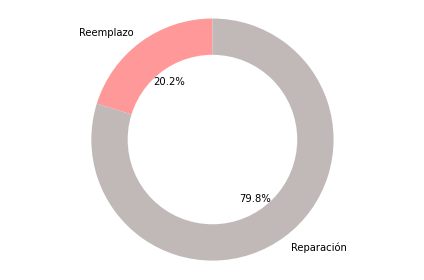

In [67]:
data = df.groupby("Solution")['Dealer'].count()
labels = ['Reemplazo','Reparación',]
colors = ['#ff9999','#C1B9B7']
fig1, ax1 = plt.subplots()
ax1.pie(data, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
fig.set_facecolor('white')

Visualizamos por línea de producto.

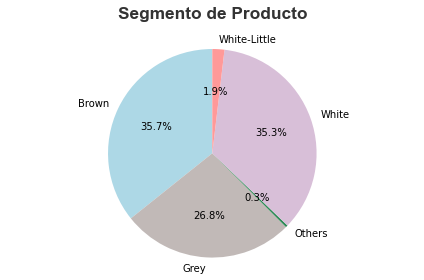

In [68]:
data = df.groupby("Product_Group")['Dealer'].count()
labels = ['Brown','Grey','Others','White','White-Little']
#colors = ['lightblue','silver','red','salmon','wheat']
colors = ['lightblue','#C1B9B7','SeaGreen','Thistle','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(data, colors=colors,labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title("Segmento de Producto",weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded',pad=20)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
fig.set_facecolor('white')

Por último lo vemos a nivel categoría de producto.

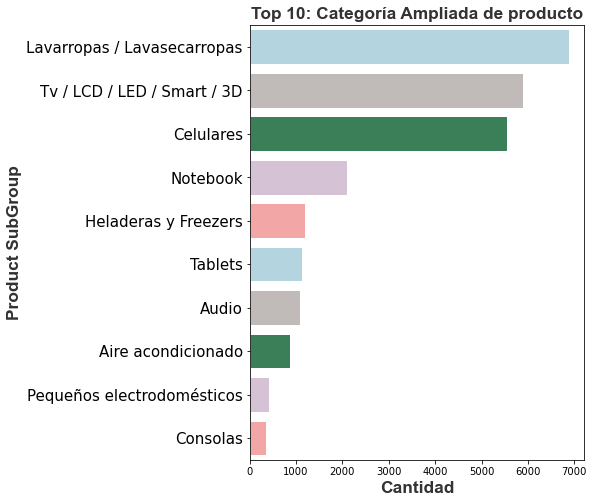

In [69]:
f, ax = plt.subplots(figsize=(6, 8))
variable_x = df.groupby(['Product_SubGroup'])[['Dealer']].count()
variable_x = variable_x.rename_axis('product_subgroup').reset_index()
orden = list(variable_x.sort_values(by='Dealer',ascending=False).product_subgroup)

with sns.axes_style('whitegrid'):
    ax = sns.barplot(x=variable_x.Dealer, y=variable_x.product_subgroup,palette=colors,ax=ax,order=orden[:10]);
    ax.set_title("Top 10: Categoría Ampliada de producto",weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.set_xlabel('Cantidad',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.set_ylabel('Product SubGroup',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.set_yticklabels(orden[:10],size=15)
    figure = ax.get_figure() 

Se muestra un gráfico de barras para los 10 'Product_Code' con más cantidad de datos.

<a id="section_numericas"></a> 
### Variables Numéricas
[volver a TOC](#section_toc)

Primer pairplot para dimensionar variables.

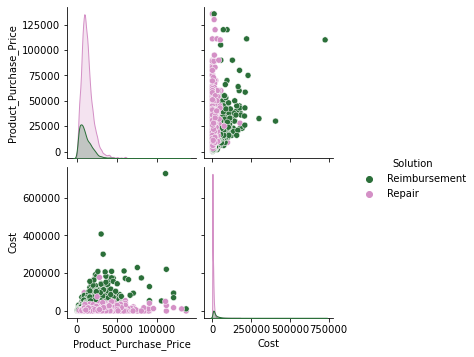

In [70]:
sns.pairplot(df[['Product_Purchase_Price','Cost','Solution']],hue='Solution', palette=palette);

Vemos que existe outliers que no permiten que las escalas nos muestren la dispersión de los datos.  
Vamos a quitar todo lo que haya tenido un costo superior a 200k (considerando en pesos argentinos).

Cantidad de registros eliminados: 9


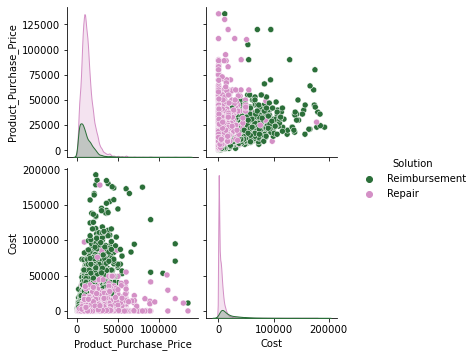

In [71]:
mask_greather200k=df.Cost<200000
print(f'Cantidad de registros eliminados: {df.shape[0]-mask_greather200k.sum()}')
df_200k=df[mask_greather200k]
sns.pairplot(df_200k[['Product_Purchase_Price','Cost','Solution']],hue='Solution', palette=palette);

Ahora podemos ver que los siniestros de reparación concentran antes de los 50 mil pesos y los de reintegro tienden a ser más caros, lo cual tiene sentido teórico.  
Veamos qué relación hay con el resto de las variables numéricas.

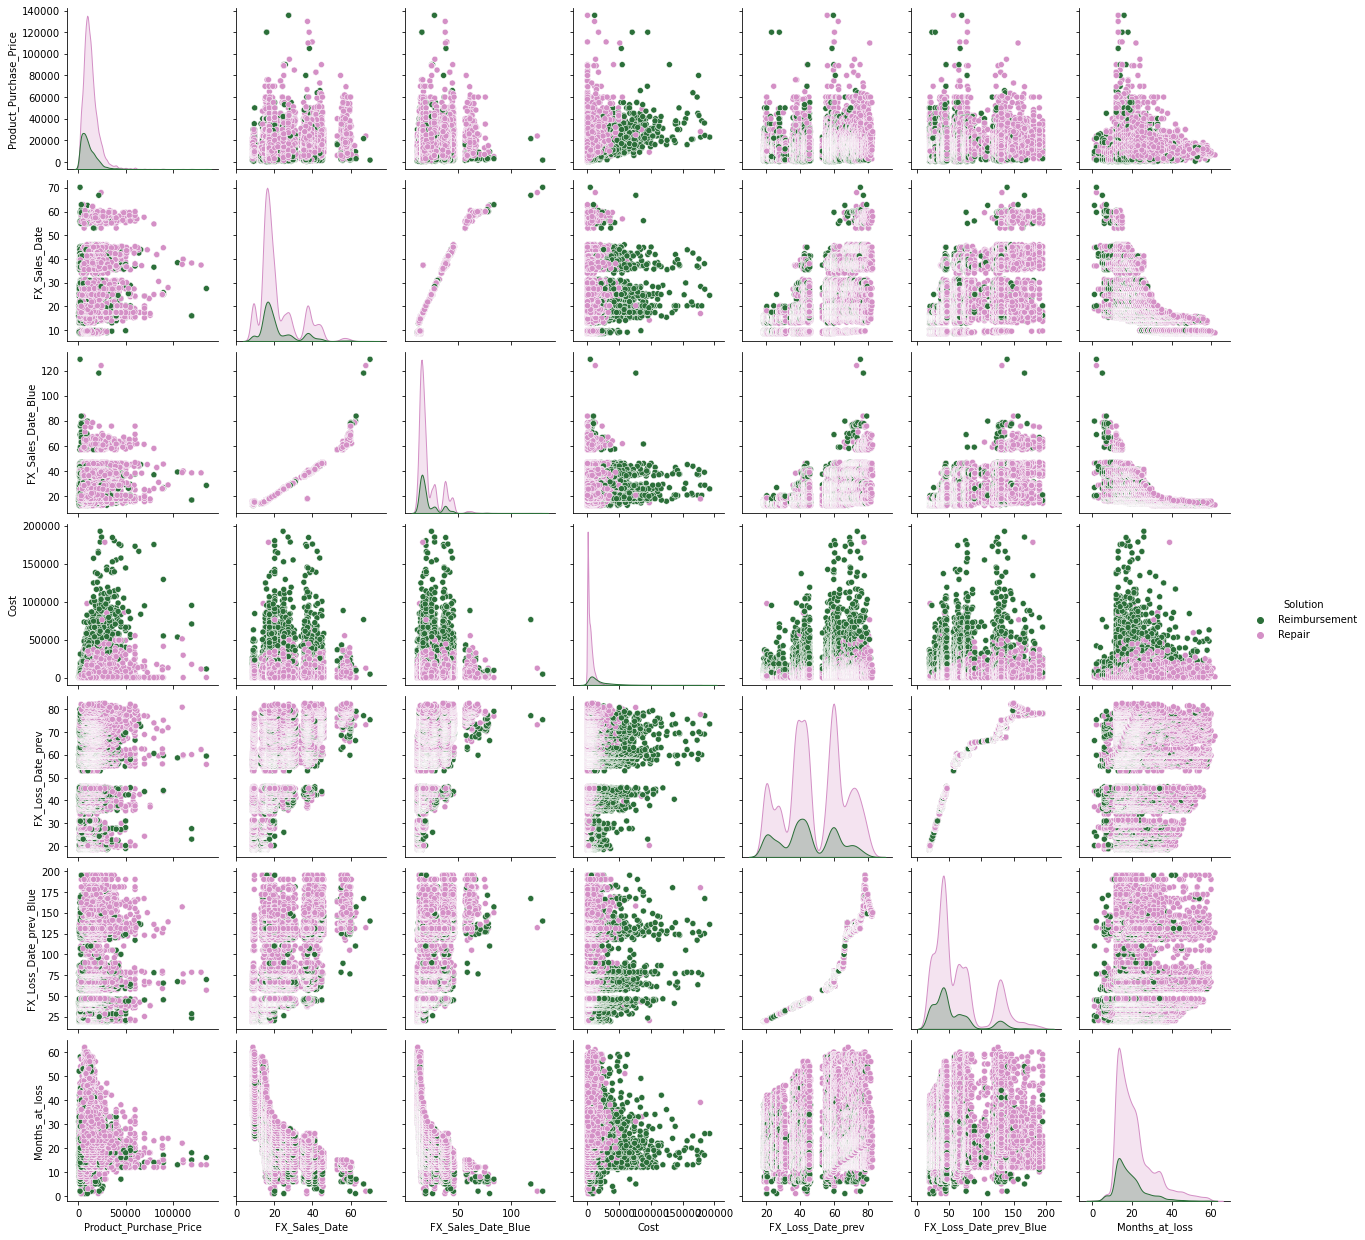

In [72]:
pairplot_features=numerical_columns.copy()
pairplot_features.append('Solution')
sns.pairplot(df_200k[pairplot_features],hue='Solution', palette=palette);

Box plot de dispersión de costos:

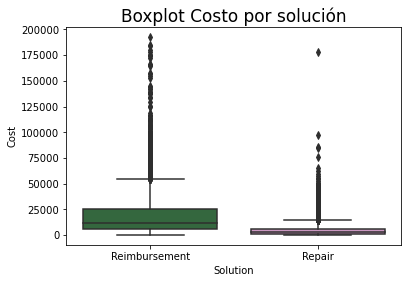

In [73]:
box=sns.boxplot(x="Solution", y="Cost", data=df_200k,palette=palette)
box.set_title("Boxplot Costo por solución",size=17);

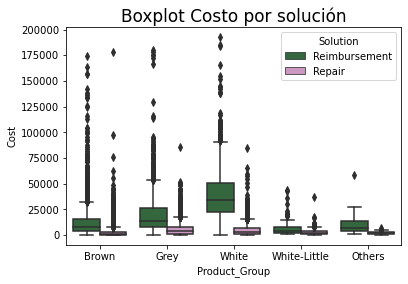

In [74]:
box=sns.boxplot(x='Product_Group',hue="Solution", y="Cost", data=df_200k,palette=palette)
box.set_title("Boxplot Costo por solución",size=17);

Vemos que pareciera haber outliers. Dado que la moneda local es pesos argentinos vamos a probar expresar los importes en una moneda estable.

Probamos analizando la correlación de las variables numericas disponibles:

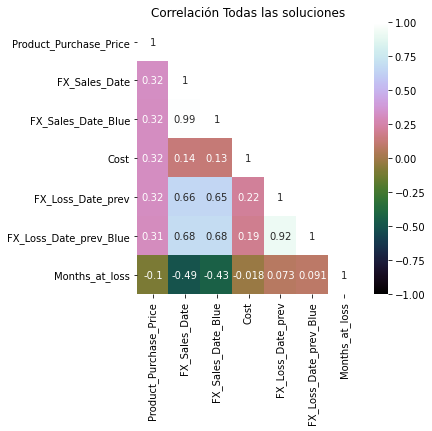

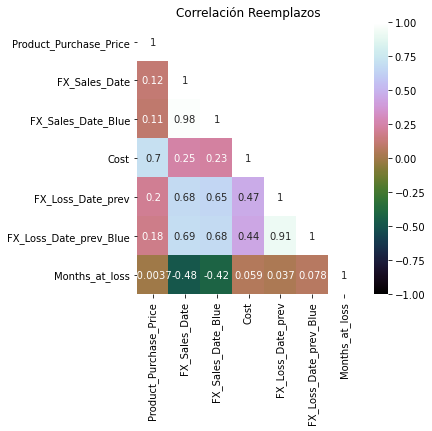

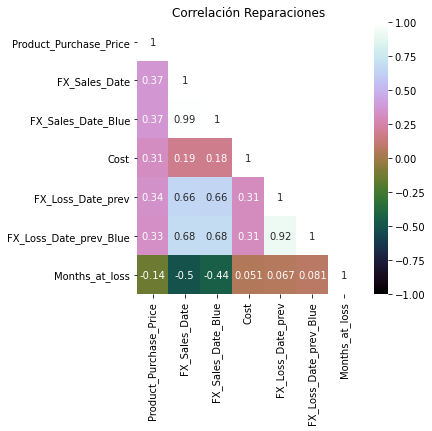

In [75]:
#Todas las soluciones
df_lt = df_200k[pairplot_features].corr().where(np.tril(np.ones(df_200k[pairplot_features].corr().shape)).astype(np.bool))
plt.figure(figsize=(5,5))
sns.heatmap(df_lt,annot=True,cmap=cmap, vmin=-1,vmax=1);
plt.title(f'Correlación Todas las soluciones');

#Solo reemplazos
df_200k_reimbursement=df_200k[df_200k.Solution=='Reimbursement']
df_lt_reimb = df_200k_reimbursement[pairplot_features].corr().where(np.tril(np.ones(df_200k_reimbursement[pairplot_features].corr().shape)).astype(np.bool))
plt.figure(figsize=(5,5))
sns.heatmap(df_lt_reimb,annot=True,cmap=cmap, vmin=-1,vmax=1);
plt.title(f'Correlación Reemplazos');

#Solo reparaciones
df_200k_repair=df_200k[df_200k.Solution=='Repair']
df_lt_repair = df_200k_repair[pairplot_features].corr().where(np.tril(np.ones(df_200k_repair[pairplot_features].corr().shape)).astype(np.bool))
plt.figure(figsize=(5,5))
sns.heatmap(df_lt_repair,annot=True,cmap=cmap, vmin=-1,vmax=1);
plt.title(f'Correlación Reparaciones');

Vemos que para los reemplazos hay correlacion significativa entre el costo y el precio del producto, y tambien con los tipos de cambio disponibles. 
En cambio al analizar reparaciones y/o total del dataset, esa correlación cae.

<a id="section_usd"></a> 
#### a. Variables en USD
[volver a TOC](#section_toc)

In [76]:
#Creación de features en USD a partir del tipo de cambio oficial
df['Product_Purchase_Price_USD']=df.Product_Purchase_Price/df.FX_Sales_Date
df['Cost_USD']=df.Cost/df.FX_Loss_Date_prev

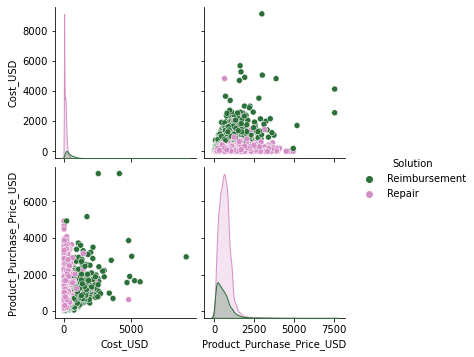

In [77]:
pairplot_features_usd=['Cost_USD','Product_Purchase_Price_USD']
pairplot_features_usd.append('Solution')
sns.pairplot(df[pairplot_features_usd],hue='Solution', palette=palette);

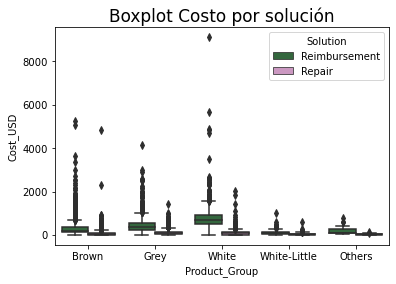

In [78]:
box=sns.boxplot(x='Product_Group',hue="Solution", y="Cost_USD", data=df,palette=palette)
box.set_title("Boxplot Costo por solución",size=17);

In [79]:
#Rangos de costos en USD
bins=[0,50,100,200,300,400,500,6000]
pd.cut(df.Cost_USD,bins).value_counts(sort=False,normalize=True)

(0, 50]        0.353682
(50, 100]      0.171030
(100, 200]     0.255962
(200, 300]     0.091101
(300, 400]     0.041413
(400, 500]     0.025615
(500, 6000]    0.061198
Name: Cost_USD, dtype: float64

A partir de los boxplot vemos que cada linea de productos podría tener un comportamiento distinto.  Haremos una limpieza de outliers por línea de producto y tipo de solución.

<a id="section_outliers"></a> 
#### b. Outliers
[volver a TOC](#section_toc)

In [80]:
df['Product_Group_Solution']=df.Product_Group +'-'+ df.Solution

In [81]:
df.Product_Group_Solution.unique()

array(['Brown-Reimbursement', 'Grey-Repair', 'White-Repair',
       'Brown-Repair', 'Grey-Reimbursement', 'White-Reimbursement',
       'White-Little-Repair', 'White-Little-Reimbursement',
       'Others-Repair', 'Others-Reimbursement'], dtype=object)

Crearemos un DataFrame vacío para guardar la máscara de registros a conservar par cada combinación de Producto/Solución.
Con un proceso recursivo vamos a calcular mediante el método intercuartil cuáles registros de cada categoría debemos eliminar.

In [82]:
products=df.Product_Group_Solution.unique()
outliers=df.Cost.to_frame()
for prod in products:
    #Cálculo de quartiles
    print(prod)
    mask=df.Product_Group_Solution==prod
    q1 = df[mask].Cost_USD.quantile(0.25)
    print(f'Q1: {round(q1,2)} USD')
    q2 = df[mask].Cost_USD.quantile(0.5)
    print(f'Q2: {round(q2,2)} USD')
    q3 = df[mask].Cost_USD.quantile(0.75)
    print(f'Q3: {round(q3,2)} USD')
    
    #Cálculo de thresholds
    iqr = (q3 - q1) * 1.5
    up_threshold = q3 + iqr
    low_threshold = q1 - iqr
    
    #Masks
    mask_no_outliers_sin_producto = np.logical_and(df.Cost_USD < up_threshold , df.Cost_USD > low_threshold)
    mask_no_outliers= np.logical_and(mask,mask_no_outliers_sin_producto)
    mask_outliers_sin_producto = np.logical_or(df.Cost_USD > up_threshold , df.Cost_USD < low_threshold)
    mask_outliers = np.logical_and(mask_outliers_sin_producto,mask)
    print(f"Resultante {mask_no_outliers.sum()} registros dentro del umbral")
    print(f"Resultante {mask_outliers.sum()} registros fuera del umbral\n")
    outliers[prod]=np.logical_and(mask,mask_outliers)

Brown-Reimbursement
Q1: 119.54 USD
Q2: 194.06 USD
Q3: 353.53 USD
Resultante 2393 registros dentro del umbral
Resultante 185 registros fuera del umbral

Grey-Repair
Q1: 37.81 USD
Q2: 103.67 USD
Q3: 161.45 USD
Resultante 5209 registros dentro del umbral
Resultante 166 registros fuera del umbral

White-Repair
Q1: 24.01 USD
Q2: 74.34 USD
Q3: 133.41 USD
Resultante 8366 registros dentro del umbral
Resultante 158 registros fuera del umbral

Brown-Repair
Q1: 6.69 USD
Q2: 25.43 USD
Q3: 99.51 USD
Resultante 6559 registros dentro del umbral
Resultante 363 registros fuera del umbral

Grey-Reimbursement
Q1: 247.35 USD
Q2: 350.69 USD
Q3: 563.59 USD
Resultante 1658 registros dentro del umbral
Resultante 82 registros fuera del umbral

White-Reimbursement
Q1: 511.2 USD
Q2: 684.62 USD
Q3: 926.84 USD
Resultante 818 registros dentro del umbral
Resultante 46 registros fuera del umbral

White-Little-Repair
Q1: 19.58 USD
Q2: 43.39 USD
Q3: 66.04 USD
Resultante 324 registros dentro del umbral
Resultante 12 reg

In [83]:
#Armado del dataset sin outliers
mask_total=outliers.drop('Cost',axis=1).sum(axis=1)
mask_boolean=mask_total==0
print(mask_total.value_counts())
df_clean=df[mask_boolean]#.drop('Product_Group_Solution',axis=1)

0    25558
1     1029
dtype: int64


Volvemos a probar los gráficos nuevamente para ver como es el comportamiento luego de la limpieza de outliers.

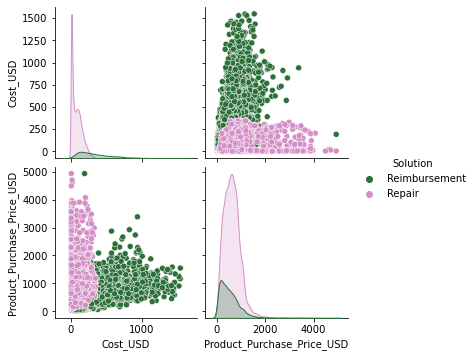

In [84]:
sns.pairplot(df_clean[pairplot_features_usd],hue='Solution', palette=palette,hue_order=['Reimbursement','Repair']);

A continuación armamos boxplots para entender comportamiento de datos segun solución y linea de negocio.

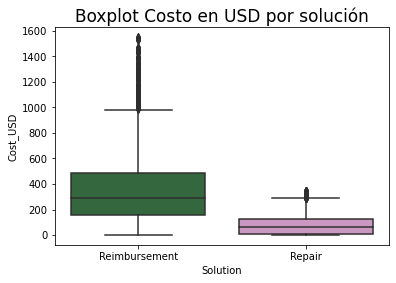

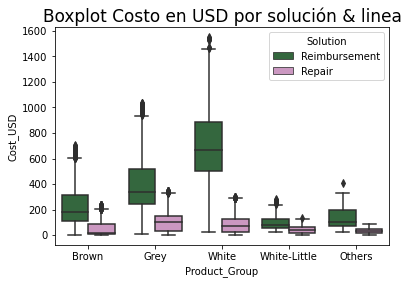

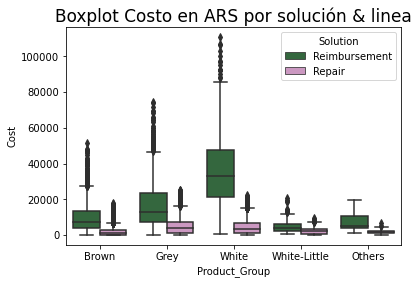

In [85]:
box=sns.boxplot(x='Solution', y="Cost_USD", data=df_clean,palette=palette,hue_order=['Reimbursement','Repair'])
box.set_title("Boxplot Costo en USD por solución",size=17);
plt.figure()
usd=sns.boxplot(x='Product_Group',hue="Solution", y="Cost_USD", data=df_clean,palette=palette,hue_order=['Reimbursement','Repair'])
usd.set_title("Boxplot Costo en USD por solución & linea",size=17);
plt.figure()
ars=sns.boxplot(x='Product_Group',hue="Solution", y="Cost", data=df_clean,palette=palette,hue_order=['Reimbursement','Repair'])
ars.set_title("Boxplot Costo en ARS por solución & linea",size=17);

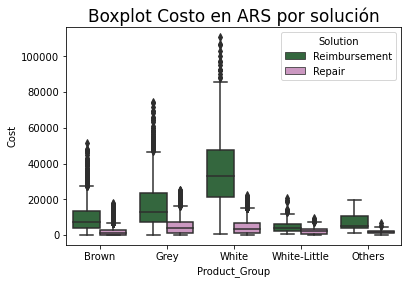

In [86]:
box=sns.boxplot(x='Product_Group',hue="Solution", y="Cost", data=df_clean,palette=palette,hue_order=['Reimbursement','Repair'])
box.set_title("Boxplot Costo en ARS por solución",size=17);

Si lo vemos por separado para cada categoría de producto:

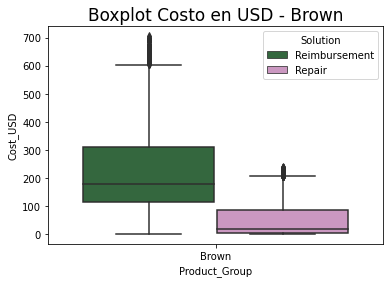

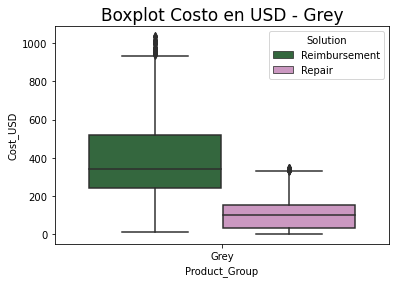

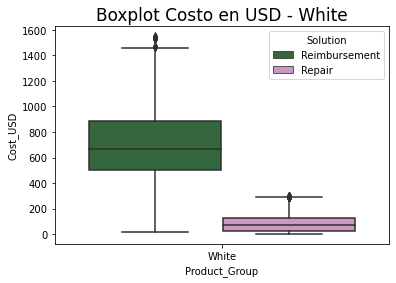

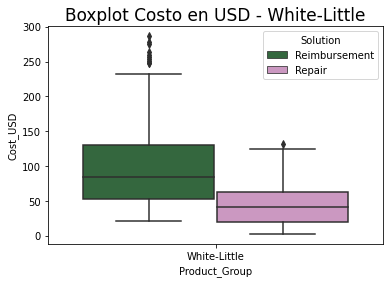

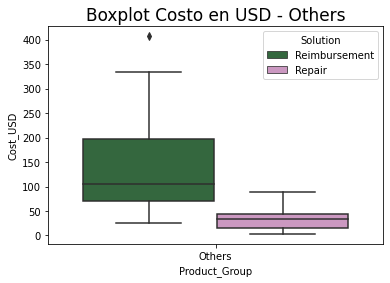

In [87]:
prod_types=df.Product_Group.unique()
for prod in prod_types:
    df_product=df_clean[df_clean.Product_Group==prod]
    plt.figure()
    box=sns.boxplot(x='Product_Group',hue="Solution", y="Cost_USD", data=df_product,palette=palette,hue_order=['Reimbursement','Repair'])
    box.set_title(f"Boxplot Costo en USD - {prod}",size=17)


Se observa que las reparaciones tienden a ser significativamente más baratas que los reemplazos.

In [88]:
#Clases mayoritarias:
df_clean.Product_Group_Solution.value_counts(normalize=True)

White-Repair                  0.327334
Brown-Repair                  0.256632
Grey-Repair                   0.203811
Brown-Reimbursement           0.093630
Grey-Reimbursement            0.064872
White-Reimbursement           0.032006
White-Little-Repair           0.012677
White-Little-Reimbursement    0.005830
Others-Repair                 0.002113
Others-Reimbursement          0.001096
Name: Product_Group_Solution, dtype: float64

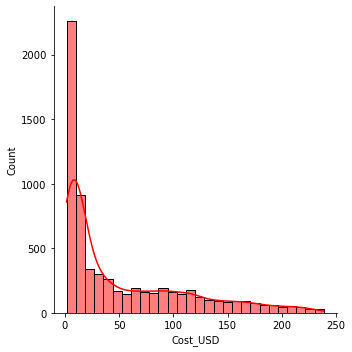

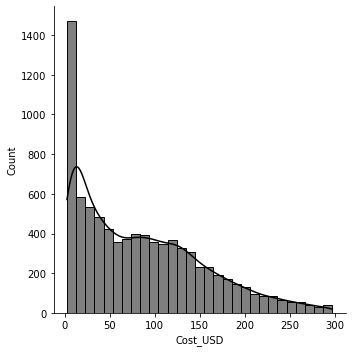

In [89]:
#Visualizamos como se distribuyen los valores de las clases mayoritarias.
df_clean_repair=df_clean[df_clean.Product_Group_Solution=='Brown-Repair']
sns.displot(data=df_clean_repair,x='Cost_USD', color='red', kde=True)
df_clean_repair=df_clean[df_clean.Product_Group_Solution=='White-Repair']
sns.displot(data=df_clean_repair,x='Cost_USD', color='black', kde=True);

In [90]:
df_clean.to_csv("Base_TP_clean.csv", sep=';', encoding='utf-8', index=False)